#  Hub Airports, airports with the most routes

In [1]:
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
names = ('id,name,city,country,iata,icao,lat,long,alt,timezone,dst,tz,type,source').split(',')
airports = pd.read_csv("data/airports.dat", header= None, names=names,  na_values='\\N')
airports.id = airports.id.astype(str)
airports.head()

,id,name,city,country,iata,icao,lat,long,alt,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [3]:
names = ('airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment').split(',')
routes = pd.read_csv("data/routes.dat", names=names, header=None)
routes = routes.fillna(0)
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,0,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,0,CR2
3,2B,410,CEK,2968,KZN,2990,0,0,CR2
4,2B,410,CEK,2968,OVB,4078,0,0,CR2


In [4]:
airport_source = routes['source_id'].value_counts()
airport_dest = routes['dest_id'].value_counts()

In [5]:
traffic = pd.DataFrame(columns = ['source_id', 'dest_id','sumtraffic'])
traffic['source_id'] = airport_source
traffic['dest_id'] = airport_dest
traffic = traffic.fillna(0)
traffic['dest_id'] = traffic['dest_id'].astype('int64')
traffic['dest_id'] = traffic['dest_id'].astype('int64')
traffic['sumtraffic'] = traffic.apply(lambda x: x['source_id'] + x['dest_id'], axis=1)
traffic.head()

,source_id,dest_id,sumtraffic
3682,915,911,1826
3830,558,550,1108
3364,535,534,1069
507,527,524,1051
1382,524,517,1041


In [6]:
traffic['id'] = traffic.index
traffic['id'] =traffic['id']
traffic.head()

,source_id,dest_id,sumtraffic,id
3682,915,911,1826,3682
3830,558,550,1108,3830
3364,535,534,1069,3364
507,527,524,1051,507
1382,524,517,1041,1382


In [7]:
traffic_final = airports.merge(traffic, on="id", how = 'inner')
traffic_final.head()

,id,name,city,country,iata,icao,lat,long,alt,timezone,dst,tz,type,source,source_id,dest_id,sumtraffic
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports,5,5,10
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports,8,8,16
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports,10,12,22
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports,11,11,22
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports,52,50,102


In [8]:
traffic_final = traffic_final[['id','name','lat','long','sumtraffic']]
traffic_final = traffic_final.set_index('id',drop = True)
traffic_final.sort_values(['sumtraffic'], ascending=[0])

,name,lat,long,sumtraffic
id,,,,
3682,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,1826
3830,Chicago O'Hare International Airport,41.978600,-87.904800,1108
3364,Beijing Capital International Airport,40.080101,116.584999,1069
507,London Heathrow Airport,51.470600,-0.461941,1051
1382,Charles de Gaulle International Airport,49.012798,2.550000,1041
3484,Los Angeles International Airport,33.942501,-118.407997,990
340,Frankfurt am Main Airport,50.033333,8.570556,990
3670,Dallas Fort Worth International Airport,32.896801,-97.038002,936
3797,John F Kennedy International Airport,40.639801,-73.778900,911


In [114]:
traffic_final= traffic_final.loc[traffic_final['sumtraffic'] > 600].sort_values(['sumtraffic'],ascending = False)
traffic_final.head()

,name,lat,long,sumtraffic
id,,,,
3682,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,1826
3830,Chicago O'Hare International Airport,41.978600,-87.904800,1108
3364,Beijing Capital International Airport,40.080101,116.584999,1069
507,London Heathrow Airport,51.470600,-0.461941,1051
1382,Charles de Gaulle International Airport,49.012798,2.550000,1041


# Plot traffic routes top airport

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

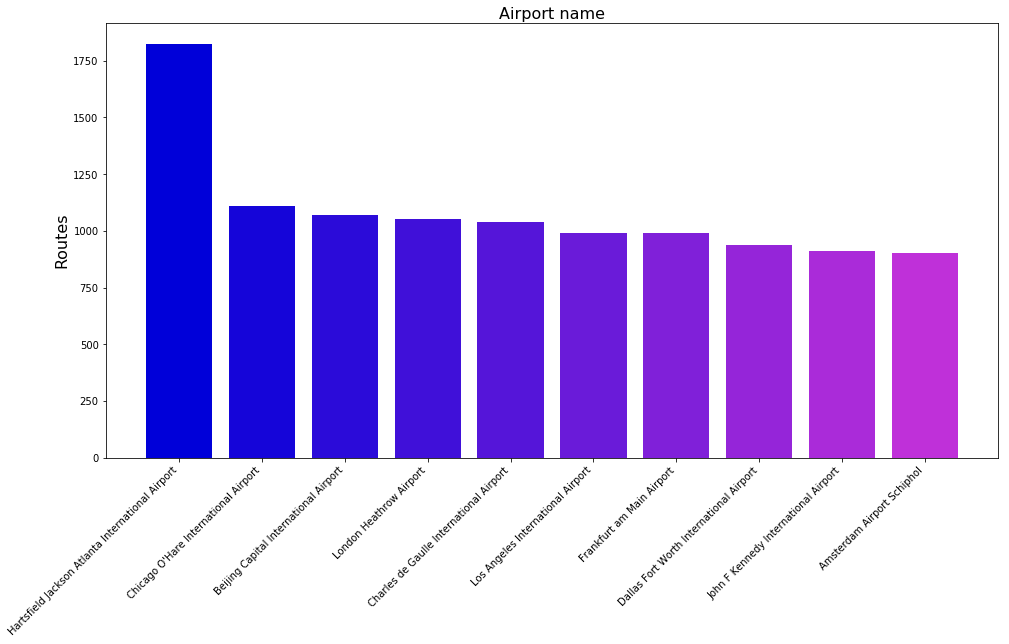

In [115]:
traffic_top= traffic_final.loc[traffic_final['sumtraffic'] > 900]

# Set color transparency (0: transparent; 1: solid)
a = 0.4
# Create a colormap
customcmap = [(x/12.0,  x/48.0, 0.85) for x in range(len(traffic_top10))]
    
# Create a figure of given size
fig = plt.figure(figsize=(16,8))
# Add a subplot
ax = fig.add_subplot(111)
# Plot
ax.bar(traffic_top['name'], traffic_top['sumtraffic'],color=customcmap)
# Set x axis label on top of plot, set label text
ax.xaxis.set_label_position('top')
xlab = 'Airport name'
ax.set_xlabel(xlab, fontsize=16)
# Set y axis label, set label text
ylabel = 'Routes'
ax.set_ylabel(ylabel, fontsize=16)
# Labels rotation
plt.xticks(rotation=45, ha='right')

# Result on interactive map with folium

In [116]:
import folium
m = folium.Map(location=[48.86, 2.33],zoom_start=2 )

In [117]:
for i in range(0,len(traffic_final)):
    lat = traffic_final.iloc[i]['lat']
    lon = traffic_final.iloc[i]['long']
    name = traffic_final.iloc[i]['name']
    size = traffic_final.iloc[i]['sumtraffic']
    folium.CircleMarker([lat, lon], radius=size/50,color='red' , popup=name+'<br>Routes : '+str(size),
        fill_color='red').add_to(m)

In [118]:
m

# Result on static map for US with cartopy

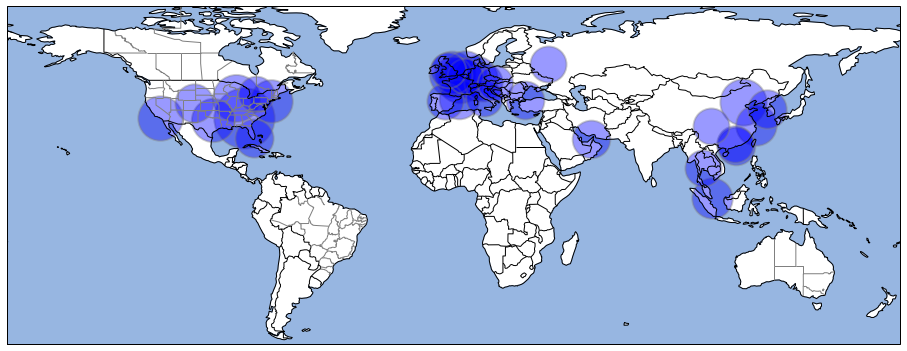

In [119]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')


fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-110, 110, -28, 60])
#ax.set_extent([-128, -62, 20, 50])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(states_provinces, edgecolor='gray')
for index, row in traffic_final.iterrows():
     #ax.plot(row.long, row.lat, '.',alpha=0.3, markersize=row.sumtraffic/5,
      #    linewidth=3, linestyle='None' )*
     ax.scatter(row.long, row.lat, s=row.sumtraffic*2, c='blue', alpha=0.4, edgecolors="grey", linewidth=2)

